# Install the python libraries in requirements.txt to run

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import string
from rapidfuzz import process, fuzz
import numpy as np


## Data cleaning

In [ ]:
# load and drop duplicate documents
fake_df = pd.read_csv('real_fake_news/Fake.csv').drop_duplicates('text')
real_df = pd.read_csv('real_fake_news/True.csv').drop_duplicates('text')

In [3]:
# strip punctuation, urls, spaces, and change to lower case, then remove duplicates again based on this
fake_df['stripped'] = [''.join([s for s in t.lower().split() if 'http' not in s]).translate(str.maketrans('', '', string.punctuation)) for t in fake_df['text']]
fake_df.drop_duplicates('stripped', inplace=True)
real_df['stripped'] = [''.join([s for s in t.lower().split() if 'http' not in s]).translate(str.maketrans('', '', string.punctuation)) for t in real_df['text']]
real_df.drop_duplicates('stripped', inplace=True)

In [4]:
# remove empty articles with no content (e.g. they just point to a video to watch or a tweet)
fake_df = fake_df[fake_df['stripped'].apply(lambda s: len(s) > 100)]
real_df = real_df[real_df['stripped'].apply(lambda s: len(s) > 100)]

In [ ]:
# take the start of each document and check the edit distance to other docs
# this is a way to detect documents that are nearly duplicates
fake_starts = [s[:500] for s in fake_df['stripped']]
real_starts = [s[:500] for s in real_df['stripped']]
fake_sims = process.cdist(fake_starts, fake_starts, workers=10, scorer=fuzz.QRatio)
real_sims = process.cdist(real_starts, real_starts, workers=10, scorer=fuzz.QRatio)
# from the plots we can see a number of documents that are early identical

Text(0.5, 1.0, 'real')

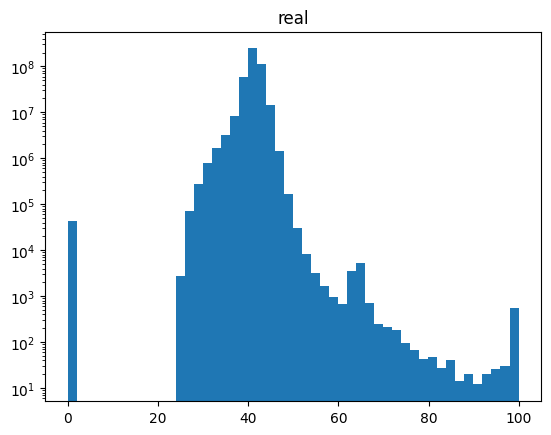

In [ ]:
# plt.hist(real_sims[np.where(real_sims != 100)], bins=50)
# plt.yscale('log')
# plt.title('real')
# strange gap between 0 and 20, no time to investigate

Text(0.5, 1.0, 'fake')

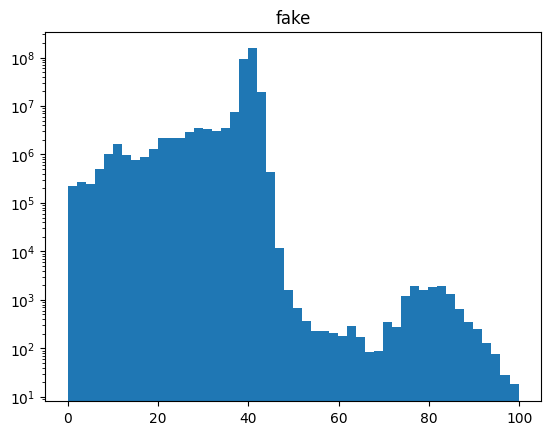

In [ ]:
# plt.hist(fake_sims[np.where(fake_sims != 100)], bins=50)
# plt.yscale('log')
# plt.title('fake')

In [ ]:
fake_near_dupes = np.where((fake_sims > 70) & (fake_sims !=100))
real_near_dupes = np.where((real_sims > 70) & (real_sims !=100))

print('real near dupes:', len(set(real_near_dupes[0].tolist() + real_near_dupes[1].tolist())))
print('fake near dupes:', len(set(fake_near_dupes[0].tolist() + fake_near_dupes[1].tolist())))
# we don't lose much good data even if some of these are not really duplicates, <5%
# it's best to remove them to avoid double dipping

real near dupes: 1016
fake near dupes: 222


In [8]:
print(real_df.iloc[real_near_dupes[0][0]]['text'])
print(real_df.iloc[real_near_dupes[1][0]]['text'])

The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Together, we are MAKING AMERICA GREAT AGAIN! bit.ly/2lnpKaq [1814 EST] - In the East, it could be the COLDEST New Year’s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up! [1901 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 
The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - The Failing @nytimes, the pipe organ for the Democrat Party, has become a virtual lobbyist for them with regar

In [9]:
print(fake_df.iloc[fake_near_dupes[0][0]]['text'])
print(fake_df.iloc[fake_near_dupes[1][0]]['text'])

Donald Trump is going to lose his shit if he reads this.Throughout the week, Trump has been viciously attacking Morning Joe host Mika Brzezinski is a disgusting display of unpresidential behavior that should get him declared unfit to hold office.I heard poorly rated @Morning_Joe speaks badly of me (don t watch anymore). Then how come low I.Q. Crazy Mika, along with Psycho Joe, came..  Donald J. Trump (@realDonaldTrump) June 29, 2017 to Mar-a-Lago 3 nights in a row around New Year s Eve, and insisted on joining me. She was bleeding badly from a face-lift. I said no!  Donald J. Trump (@realDonaldTrump) June 29, 2017Those tweets alone drew sharp condemnation nationwide from Democrats and Republicans alike. Trump s White House team pathetically attempted to defend him, but most Americans were sickened by his attacks.And then Trump attacked Brzezinski again yesterday.Crazy Joe Scarborough and dumb as a rock Mika are not bad people, but their low rated show is dominated by their NBC bosses. 

In [7]:
near_dupes = zip(fake_near_dupes[0].tolist(), fake_near_dupes[1].tolist())
deduped = set()
to_remove = set()
for pair in near_dupes:
    deduped.add(pair[0]) # we remove all its dupes below, so we don't want to remove it
    if pair[1] not in deduped:
        to_remove.add(pair[1])

fake_df.drop(fake_df.iloc[list(to_remove)].index, inplace=True)


near_dupes = zip(real_near_dupes[0].tolist(), real_near_dupes[1].tolist())
deduped = set()
to_remove = set()
for pair in near_dupes:
    deduped.add(pair[0]) # we remove all its dupes below, so we don't want to remove it
    if pair[1] not in deduped:
        to_remove.add(pair[1])

real_df.drop(real_df.iloc[list(to_remove)].index, inplace=True)

In [8]:
real_df.to_csv('real.csv')

In [9]:
fake_df.to_csv('fake.csv')

In [4]:
real_df = pd.read_csv('real.csv')
fake_df = pd.read_csv('fake.csv')

In [36]:
fake_df

,Unnamed: 0,title,text,subject,date,stripped
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donaldtrumpjustcouldntwishallamericansahappyne...
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",houseintelligencecommitteechairmandevinnunesis...
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",onfridayitwasrevealedthatformermilwaukeesherif...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",onchristmasdaydonaldtrumpannouncedthathewouldb...
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",popefrancisusedhisannualchristmasdaymessagetor...
...,...,...,...,...,...,...
16864,22697,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,US_News,"January 12, 2016",21stcenturywiresaysas21wirepredictedinitsnewye...
16865,22698,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",21stcenturywiresaysalltheworldsastageandallthe...
16866,22699,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",randyjohnson21stcenturywirethemajorityofmainst...
16867,22701,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",21stcenturywiresaysanewfronthasjustopenedupint...


## Step 1 - Baseline

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [5]:
# start with word freqs as features: tf-idf
fake_docs, real_docs = fake_df['text'].to_list(), real_df['text'].to_list()
# we must limit the vocab size to ensure num features << num samples or we risk overfitting
# to do this we set cut-off thresholds for rare and common words
doc_vectorizer = TfidfVectorizer(min_df=.01, max_df=.9)
docs_tf_idf = doc_vectorizer.fit_transform(fake_docs + real_docs)

In [6]:
fake_titles, real_titles = fake_df['title'].to_list(), real_df['title'].to_list()
title_vectorizer = TfidfVectorizer(min_df=.01, max_df=.9)
titles_tf_idf = title_vectorizer.fit_transform(fake_titles + real_titles)

In [ ]:
# make one hot feature for subject
# I learn later that this feature is problematic, I don't use it in the end
enc = OneHotEncoder()
subject_feature = enc.fit_transform(np.array(fake_df['subject'].to_list() + real_df['subject'].to_list()).reshape(-1, 1))

# process datetime --> not worth it: it has inconsistent formating and this is not a feature we want to rely on anyway (it doesn't generalize to future news)


In [7]:
# put features together
features = np.hstack([titles_tf_idf.todense(), docs_tf_idf.todense()])#, subject_feature.todense()])
labels = len(fake_docs) * [1] + len(real_docs) * [0]
features.shape # we have an order of magnitude more samples than features, good for avoiding overfitting

(37521, 3359)

In [ ]:
len(real_docs)/(len(fake_docs)+len(real_docs))
# roughly balanced dataset, chance level accuracy:

0.5504117694091308

In [8]:
# 60 - 40 train-test split
df = pd.DataFrame(features)
df['label'] = labels
train_df, test_df = train_test_split(df, test_size=0.4, random_state=421, stratify=df['label'])

In [9]:
# train SVM (linear kernel)
# I choose this model because the learned wieghts are easily accessed in order to show which features are most important
# in my experience with word freqs, it also generalizes a bit better than other linear models -- the support vectors help in a sparse feature situation
clf = SVC(kernel='linear')
clf.fit(train_df[train_df.columns[:-1]], train_df['label']) # fit on all but the last column (labels)


SVC(kernel='linear')

In [21]:
def compute_metrics(predictions, labels):
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

In [13]:
# training metrics
preds = clf.predict(train_df[train_df.columns[:-1]])
compute_metrics(preds, train_df['label'])

{'accuracy': 0.9981787491115849,
 'f1': 0.9979738077588337,
 'precision': 0.9983191615582361,
 'recall': 0.9976286928169154}

In [14]:
# test metrics
preds = clf.predict(test_df[test_df.columns[:-1]])
compute_metrics(preds, test_df['label'])
# the model is increadible!? this is too good to be true

{'accuracy': 0.9944033579852088,
 'f1': 0.9937648456057007,
 'precision': 0.9955383700178465,
 'recall': 0.9919976289270895}

In [11]:
# suspiciously high performance, let's look at the weights
# get the indexes of the top largest amplitude (most important) weights 
sorted_indexes = np.argsort(np.abs(clf.coef_[0]))

Text(0.5, 1.0, 'absolute value of the top 20 wieghts')

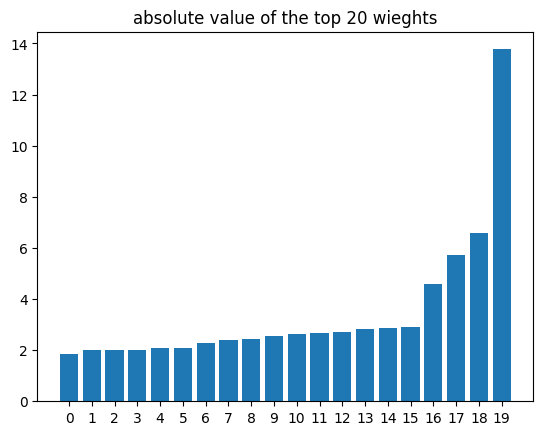

In [17]:
# top features
plt.bar(list(range(20)), [abs(clf.coef_[0][i]) for i in sorted_indexes[-20:]])
plt.xticks(list(range(20)))
plt.title('absolute value of the top 20 wieghts')

In [ ]:
# we can see the top 4 weights dominate, let's see what they correspond to
sorted_indexes[-4:]

array([2466, 2657, 3192, 2606])

In [12]:
doc_vocab_map = {v: k for k, v in doc_vectorizer.vocabulary_.items()}

In [27]:
doc_vec_feature_indexes = sorted_indexes[-4:] - titles_tf_idf.shape[1]
feature_names = [doc_vocab_map[i] for i in doc_vec_feature_indexes]

Text(0.5, 1.0, 'weights of most important features')

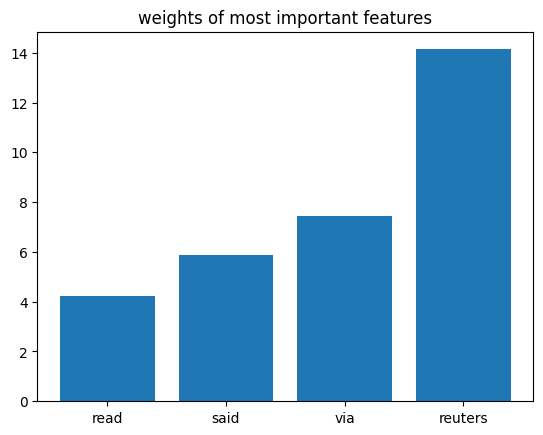

In [28]:
plt.bar(feature_names, np.abs(clf.coef_[0][sorted_indexes[-4:]]))
plt.title('weights of most important features')

Text(0.5, 1.0, 'mean tf-idf value of the top words in each dataset')

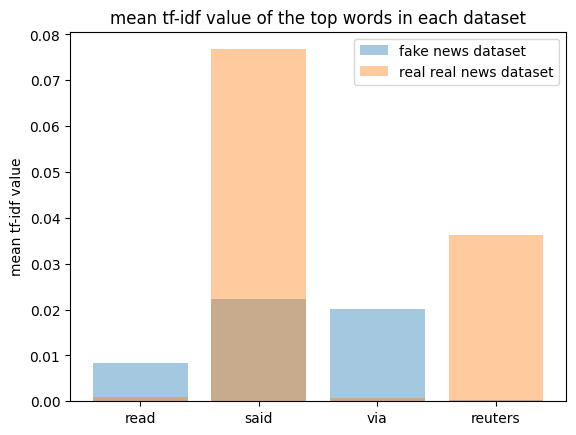

In [ ]:
plt.bar(feature_names, [np.mean(docs_tf_idf[:len(fake_docs), i]) for i in doc_vec_feature_indexes], label='fake news dataset', alpha=.4)
plt.bar(feature_names, [np.mean(docs_tf_idf[len(fake_docs):, i]) for i in doc_vec_feature_indexes], label='real real news dataset', alpha=.4)
plt.legend()
plt.ylabel('mean tf-idf value')
plt.title('mean tf-idf value of the top words in each dataset')
# we can see that the terms 'read' and 'via' are more frequent in fake news relative to their document frequency
#  'said' and 'reauters' are more prevalent in real news
# a bit like how humans work, the model has learnt that reuters is a trusted source. 
# This is not ideal as we would like to classify solely on the content: 
# conditions around the content could change in the future (e.g. reuters no longer reliable) and the model would have trouble generalizing.

In [125]:
real_df['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [126]:
fake_df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News'],
      dtype=object)

### The fake and real news datasets don't share the same subjects! of course classification is trivial in this case, a huge oversight
I could rename the real news subjects to match the fake ones (politicsNews --> politics, worldnews --> News) but this would still leave categories that never appear in the real news, confounding results. Instead it is more appropriate to remove this feature entirely.

The instructions indicate the dataset contains 3 domains: News, Politics, and Other, but this does not seem to be tha case. They could be grouped into news and politics, but there is no subject that corresponds to 'other'. The instructions say to measure performance stratified by domain, but given the confusion here I will abstain from doing so. In any case, the overall performance is (suspiciously) so good that we will likely see the same thing in stratified cases (if one strata had less than great performance, the overall performance would not be so good).

## Step 2 - improvement
There is little room left for improvement in terms of performance as we already have > .99 precision and recall. This is suspiciously good but I can't find any issues in my code. However we are using far more features than we need, I will reduce these here and then inspect them more closely to see if I'm doing something wrong.

In [16]:
# take just the top 100 features
sorted_indexes[-100:]

array([1974, 2559, 1835, 3272, 2330, 2560, 1696,  132, 2590, 1359, 2197,
       2863,  533, 1068, 2006,   96, 2997, 2895,   45,  356, 1609, 3024,
       2608,   52, 2988, 2000, 1892, 1570, 1817, 3155, 1569, 2806,  556,
       1063,  846, 3069, 2136,  242,  387,  127, 2328, 1379, 2671, 1131,
         63, 2485, 2433,  498,  773, 1196, 1869,  357, 3248, 1917, 1474,
       2254, 3012, 2070, 2716, 3342, 3059, 2772, 3271, 1025, 2553, 1530,
        181, 3304, 1591, 2555, 2557, 1170, 3033, 2812, 2626, 1330, 1747,
       3265,  928,  180, 3122,  765, 2565, 3171,  589, 1439,   16, 2543,
       3041, 3245, 2018, 2095, 1418,  128, 1590, 1281, 2466, 2657, 3192,
       2606])

In [14]:
title_vocab_map = {v: k for k, v in title_vectorizer.vocabulary_.items()}

In [15]:
# map them to their corresponding words
title_words = []
doc_words = []
for i in sorted_indexes[-100:]:
    if i < titles_tf_idf.shape[1]: # then it is a word in the title
        title_words.append(title_vocab_map[i])
    else: # it is a word in the doc
        doc_words.append(doc_vocab_map[i - titles_tf_idf.shape[1]])

In [16]:
# now the vocab size is small enough that I can manually go through and remove potentially problematic vocabulary
title_words

['watch', 'racist', 'gop', 'hillary', 'us', 'just', 'breaking', 'video']

In [17]:
doc_words

['militants',
 'representative',
 'liberal',
 'went',
 'press',
 'representatives',
 'isn',
 'respond',
 'former',
 'paragraph',
 'stand',
 'below',
 'doesn',
 'morning',
 'television',
 'story',
 'america',
 'inc',
 'that',
 'revealed',
 'taxpayer',
 'money',
 'mail',
 'https',
 'led',
 'united',
 'however',
 'social',
 'bit',
 'dnc',
 'continued',
 'today',
 'only',
 'according',
 'anyone',
 'presidential',
 'friday',
 'saying',
 'election',
 'recently',
 'questions',
 'barack',
 'comment',
 'even',
 'london',
 'american',
 'watch',
 'market',
 'had',
 'pic',
 'terror',
 'newspaper',
 'sen',
 'xi',
 'thursday',
 'showed',
 'well',
 'didn',
 'reportedly',
 'hillary',
 '21wire',
 'wire',
 'images',
 'reporters',
 'reports',
 'entire',
 'these',
 'some',
 'rival',
 'flickr',
 'just',
 'wednesday',
 'daily',
 '21st',
 'tuesday',
 'com',
 'republican',
 'us',
 'breitbart',
 'gop',
 'rep',
 'this',
 'washington',
 'mr',
 'nov',
 'getty',
 'image',
 'featured',
 'read',
 'said',
 'via',
 'r

In [18]:
# I decide to remove these terms that likely don't pertain to the content ex: daily mail is a newspaper
doc_words = list(set(doc_words) - {'reuters', 'getty', 'washington', 'com', 'inc', 'daily', 'mail', 'flickr', '21wire'})

In [19]:
fake_docs, real_docs = fake_df['text'].to_list(), real_df['text'].to_list()
doc_vectorizer = TfidfVectorizer(vocabulary=doc_words)
docs_tf_idf = doc_vectorizer.fit_transform(fake_docs + real_docs)

fake_titles, real_titles = fake_df['title'].to_list(), real_df['title'].to_list()
title_vectorizer = TfidfVectorizer(vocabulary=title_words)
titles_tf_idf = title_vectorizer.fit_transform(fake_titles + real_titles)

In [20]:
features = np.hstack([titles_tf_idf.todense(), docs_tf_idf.todense()])
labels = len(fake_docs) * [1] + len(real_docs) * [0]
features.shape

(37521, 91)

In [23]:
# 60 - 40 train-test split
df = pd.DataFrame(features)
df['label'] = labels
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['label'])

In [24]:
clf = SVC(kernel='linear')
clf.fit(train_df[train_df.columns[:-1]], train_df['label'])

SVC(kernel='linear')

In [25]:
# training metrics
preds = clf.predict(train_df[train_df.columns[:-1]])
compute_metrics(preds, train_df['label'])

{'accuracy': 0.9810323383084577,
 'f1': 0.9788204950151282,
 'precision': 0.9827689243027888,
 'recall': 0.9749036656456872}

In [ ]:
# test metrics
preds = clf.predict(test_df[test_df.columns[:-1]])
compute_metrics(preds, test_df['label'])
# with just 91 features the model is still extremely good.

{'accuracy': 0.9772802984875741,
 'f1': 0.9745996275605214,
 'precision': 0.9797813389246668,
 'recall': 0.9694724362774155}

In [32]:
# does it generalize? is the performance too good to be true? If it's terrible on an entirely new dataset, I've likely done something wrong.

new_dataset = pd.read_csv('WELFake_Dataset.csv').dropna()

In [33]:
new_dataset

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [34]:
new_features = np.hstack([title_vectorizer.transform(new_dataset['title']).todense(), doc_vectorizer.transform(new_dataset['text']).todense()])

In [ ]:
preds = clf.predict(np.array(new_features))
compute_metrics(preds, new_dataset['label'])
# the metrics now look more realistic. We have some degree of overfitting, but the model does generalize reasonably well

{'accuracy': 0.8252233110138809,
 'f1': 0.8385397161563594,
 'precision': 0.7932711102423768,
 'recall': 0.8892875729272234}

### There a few things I can do with the remaining time:
I could re-run everithing with more data from varied datasets in order to generalize better, however I have already demonstrated that I can do this with the original dataset. Instead I think I should do some stratified metrics in order to show that I understand how, even if the instructions and the provided dataset are contradictory.

In [43]:
real_df['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [44]:
# first make the domains consistent (the mapping is a bit arbitrary. is Government News politics or news?)
sub_map = {'US_News': 'news', 'left-news': 'politics', 'Government News': 'news', 'News': 'news', 'politics': 'politics'}
fake_df['subject'] = fake_df['subject'].apply(lambda x: sub_map[x])

In [46]:
sub_map = {'worldnews': 'news', 'politicsNews': 'politics'}
real_df['subject'] = real_df['subject'].apply(lambda x: sub_map[x])

In [52]:
for domain in ['news', 'politics']:
    fake_df_strat = fake_df[fake_df['subject']==domain]
    real_df_strat = real_df[real_df['subject']==domain]

    fake_docs, real_docs = fake_df_strat['text'].to_list(), real_df_strat['text'].to_list()
    doc_vectorizer = TfidfVectorizer(vocabulary=doc_words)
    docs_tf_idf = doc_vectorizer.fit_transform(fake_docs + real_docs)

    fake_titles, real_titles = fake_df_strat['title'].to_list(), real_df_strat['title'].to_list()
    title_vectorizer = TfidfVectorizer(vocabulary=title_words)
    titles_tf_idf = title_vectorizer.fit_transform(fake_titles + real_titles)


    df = pd.DataFrame(features)
    df['label'] = labels
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=421, stratify=df['label']) # increse the training proportion as we have less data in each strata


    preds = clf.predict(test_df[test_df.columns[:-1]])
    print('Domain:', domain, compute_metrics(preds, test_df['label']))
    print('chance level accuracy:', 1 - sum(df['label'])/len(df['label']))

Domain: news {'accuracy': 0.9768154563624251, 'f1': 0.9740608228980322, 'precision': 0.9799040191961608, 'recall': 0.9682868998221695}
label distribution (for chance level accuracy): 0.5504117694091308
Domain: politics {'accuracy': 0.9768154563624251, 'f1': 0.9740608228980322, 'precision': 0.9799040191961608, 'recall': 0.9682868998221695}
label distribution (for chance level accuracy): 0.5504117694091308


There's an issue with the stratified metrics but I've no time to look into it.

Given time, I would also like to:
 - clean up file structure, and plots/presentation
 - refactor my scripts into a proper model pipeline